<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 5 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 11 October 2019, with material from Chris Fonnesbeck and Cyrille Rossant</div>
<div style="text-align: right"><i>please browse all URLs in this notebook</i></div>


# Classical Statistical Data Analysis

Machine models like regression forests are *sexy* because you the computer builds the curve for you, but there are many cases where ***you can build the curve for you***, and before powerful computers, statisticians did not know about ML. So let's go back in time about a decade and look at what Neanderthal scientists did. Actually, there is good stuff to learn.

The primary goal of statistical data analysis is to create a model for the datapoints so you can throw away the data and use the model instead.

A less ambitous goal of statistical data analysis is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or how baseball players' pe rformance varies as a function of age.

Bayesian models, which we're going to look at next, involve very advanced, probabilistic programming. We only now have the computer power to run these programs. What did Neanderthal man do when he tried to do statistical data analysis?

<br />
<center>
<img src =images/caveman.png width = 400 />
</center>

Let's look at the two most popular statistical methods prior to the resounding success of Bayesian estimation: ***Method Of Moments** (MOM) and **Maximum Likelihood Estimation** (MLE). We'll also take this opportunity to introduce another important pdf from our catalogue of pdfs.

# 1. Method Of Moments (MOM) 

We'll illustrate the **Method of Moments** (MOM) with ***an example***. 

When you take a ***bad*** class in statistics, where you don't udnerstand or tend to fall asleep at the helm, it's the ***fault of the professor, not yours***.

<br />
<center>
<img src =images/asleep.jpg width = 400 />
</center>

A good professor with give you the relevant equations and apply them to an ***interesting problem***. Then you’ll have an appreciation for how statistics helps us to understand the world. There are many **amazing phenomena** in the world, and we use data science as a tool for exploring them.

First, some new distributions:

## The Gamma distribution

</br >
<center>
<img src="images/ohnonotmath.png" width=200 />
</center>

This is the [**gamma distribution**](https://en.wikipedia.org/wiki/Gamma_distribution):

<div style="font-size: 120%;">  
$$f(x) = \frac{\beta^\alpha x^{\alpha -1} e^{- \beta x}}{\Gamma (\alpha)}$$
</div>

And... what is the $\Gamma()$ function? It [interpolates](https://en.wikipedia.org/wiki/Gamma_function) the factorial function to non-integer values. Pretty cool.

The gamma distribution is a ***two-parameter*** ($\alpha, \beta$) family of ***continuous*** probability distributions.

In Bayesian statistics, the **gamma distribution** is used as a [**conjugate prior**](https://en.wikipedia.org/wiki/Conjugate_prior) distribution for the **exponential distribution** and the **Poisson distribution**.

When the posterior distributions $p(θ \; | \; x)$ are in one probability distribution family as the prior probability distribution $p(θ)$ is in another family in Bayes' formula:

$$p(θ \; | \; x) = \frac{p(x \;| \; θ) \; p(θ)}{p(x)}$$

then the prior and posterior are called **conjugate distributions**, and the prior is called a **conjugate prior for the likelihood function** $p(x \;| \; θ)$.

The Gamma distribution is a distribution that arises naturally in processes for which the ***waiting times between events are relevant***. It can be thought of as a **waiting time** between **Poisson distributed events**, such as in queuing models, climatology, and financial services. 
 
 Examples of events that may be modeled by a gamma distribution include but are not limited to:
- Public transportation
- Amount of [rainfall](http://journals.tubitak.gov.tr/engineering/issues/muh-00-24-6/muh-24-6-7-9909-13.pdf). accumulated in a reservoir
- The size of loan defaults or aggregate [insurance claims]((https://www.crcpress.com/Statistical-and-Probabilistic-Methods-in-Actuarial-Science/Boland/p/book/9781584886952)
- The flow of items through manufacturing and distribution processes
- Visitors to a website
- Customers calling a help center 
- Radioactive decay in atoms
- Movements in a stock price

For $x > 0$ and $\alpha, \beta > 0$

</br >
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg" width="500" />
Gamma distribution
</center>

In other words, the Gamma distribution ***very important*** in Data Science.

### For discrete random variables: This is the Poisson distribution:

A [Poisson distributed process](https://en.wikipedia.org/wiki/Poisson_distribution), conjugate prior of the Gamma, is a **model** for a series of discrete event where the ***average time*** between events is known, but the exact timing of events is ***random***.  The arrival of an event is independent of the event before (waiting time between events is memoryless).

A Poisson Process meets the following criteria (in reality many phenomena modeled as Poisson processes don’t meet these *exactly*):
- Events are independent of each other. The occurrence of one event does not affect the probability another event will occur
- The average rate (events per time period) is constant
- Two events cannot occur at the same time

<div style="font-size: 120%;">  
$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

$$E(X) = \text{Var}(X) = \lambda$$

![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

### For continuous random variables: This is the exponential distribution

Simple enough: an exponential (conjugate prior of the Gamma).

<div style="font-size: 120%;">  
$$Pr(X=x)= \lambda e^{-\lambda x}$$
</div>

$$X \in [0,1]$$
$$Y \in (-\infty, \infty)$$

**Probability Density Function**: 

For continuous $X$,

![Continuous variable](http://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg)

### For continuous random variables: The gaussian distribution

And since we're plotting distributions, let's remember our good old friend, the **gaussian** or **normal** distribution that we observed by watching balls fall over a triangular sieve. The conjugate prior of a gaussian is ***always a gaussian***!

<div style="font-size: 120%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

![Continuous variable](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

## Goal

Ok, these parametrized distributions happen to *look like* a vast majority of datasets!

We're now going to use them as potential models to datasets we observe. 

## Use Case \#1: Nashville Precipitation

The dataset `nashville_precip.txt` contains NOAA precipitation data for Nashville measured since 1871. It is a classical dataset like the iris dataset. Download it from blackboard and put it in the right folder (you know..). The gamma distribution is a good fit to aggregated rainfall data, and will be our candidate distribution in this case. We'll use the gamma distribution model for Nashville precipitation to demonstrate MOM and MLE.

Let's peek at the data:

In [1]:
import pandas as pd

In [6]:
!pwd
! cd /Users/ramesh0101/Desktop/DSEM_Lectures

/Users/ramesh0101/Desktop/DSEM_Lectures/Lecture4/Lecture4D2 2


In [9]:
precip = pd.read_table("/Users/ramesh0101/Desktop/DSEM_Lectures/Lecture4/Lec4_Data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

### 1.1 Data Exploration: The Histogram

Let's do some data exploration with the ***histogram*** of precipitations per month. The histogram tells us, for each month,  what's the most frequent number of feet of rain.

</br >
<center>
<img src="images/rainfall.jpeg" width=400 />
</center>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

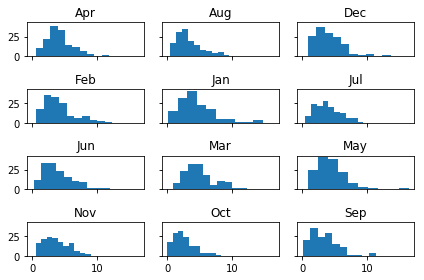

In [12]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data is skewed, with a longer tail to the right than to the left
2. The data is positive-valued, since they are measuring rainfall
3. The data is continuous

Even just by ***eyeballing*** the histograms, ***even if you did not know what the Gamma distribution is usually used for***, a good option appears to be the **gamma distribution**: The curves look like ***Gaussians with long tails***. That's a Gamma!

<div style="font-size: 120%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

### 1.2 Data Cleansing 

***Wait***, there's something ***wrong*** with our data.. if you open it in a text editor, you will find a value of **NA** for October of 1963 (take a look). 

So we have to do some **data cleansing** first. 

Given what we are trying to do, it is ***sensible*** to fill in the missing value with the average of the available values (another option would have been the average of the months of September and November 1963).


In [13]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

Jan    Feb    Mar    Apr    May    Jun   Jul   Aug    Sep   Oct   Nov  \
Year                                                                            
1871   2.76   4.58   5.01   4.13   3.30   2.98  1.58  2.36   0.95  1.31  2.13   
1872   2.32   2.11   3.14   5.91   3.09   5.17  6.10  1.65   4.50  1.58  2.25   
1873   2.96   7.14   4.11   3.59   6.31   4.20  4.63  2.36   1.81  4.28  4.36   
1874   5.22   9.23   5.36  11.84   1.49   2.87  2.65  3.52   3.12  2.63  6.12   
1875   6.15   3.06   8.14   4.22   1.73   5.63  8.12  1.60   3.79  1.25  5.46   
1876   6.41   2.22   5.28   3.62   3.40   5.65  7.15  5.77   2.52  2.68  1.26   
1877   4.05   1.06   4.98   9.47   1.25   6.02  3.25  4.16   5.40  2.61  4.93   
1878   3.34   2.10   3.48   6.88   2.33   3.28  9.43  5.02   1.28  2.17  3.20   
1879   6.32   3.13   3.81   2.88   2.88   2.50  8.47  4.62   5.18  2.90  5.85   
1880   3.74  12.37   8.16   5.26   4.13   3.97  5.69  2.22   5.39  7.24  5.77   
1881   3.54   5.48   2.79   5.12   3.67   3.70  0.86  1.81   6.57  4.80  4.89   
1882  14.51   8.61   9.38   3.59   7.38   2.54  4.06  5.54   1.61  1.11  3.60   
1883   3.76   7.90   3.98   9.12   4.82   3.82  4.94  4.47   2.23  5.27  3.11   
1884   7.20   8.18   8.89   3.51   3.58   6.53  3.18  2.81   2.36  2.43  1.57   
1885   6.29   2.00   2.33   3.75   4.36   3.72  5.26  1.02   5.60  2.99  2.73   
1886   5.18   3.82   4.76   2.36   2.10   7.69  1.90  5.50   3.68  0.51  5.76   
1887   5.13   8.47   3.36   2.67   3.43   2.31  3.77  2.89   6.85  1.92  2.29   
1888   6.29   3.78   6.46   4.18   2.97   4.68  2.36  7.03   3.82  2.82  4.33   
1889   3.83   1.84   2.47   2.83   5.30   5.33  2.74  1.57   6.81  1.54  6.88   
1890   8.10  10.95   8.64   3.84   4.16   2.23  0.46  6.59   5.86  3.01  2.01   
1891   6.15   6.96  10.31   2.24   2.39   6.50  1.49  3.72   1.25  0.84  6.71   
1892   2.81   2.73   4.10   7.45   4.03   5.01  5.13  3.39   4.78  0.25  3.91   
1893   1.27   4.88   3.37   4.11   7.31   4.74  2.12  1.92   6.43  3.68  2.97   
1894   4.28   8.65   2.69   4.05   2.53   3.55  5.45  2.43   3.07  0.53  1.92   
1895   5.71   0.98   5.09   3.07   2.05   2.90  7.14  1.40   6.69  1.57  2.14   
1896   1.37   3.65   6.45   2.92   4.05   1.82  7.33  1.40   2.74  0.98  5.71   
1897   3.13   3.84   8.49   5.79   1.22   1.82  8.53  2.34   0.19  0.92  2.83   
1898   9.46   0.63   5.36   3.16   1.80   4.97  4.50  6.56   4.87  3.21  3.09   
1899   5.59   5.19   7.81   3.25   3.36   0.75  6.44  2.53   1.50  1.83  1.55   
1900   2.61   3.80   2.20   4.04   1.86  10.35  2.87  1.24   4.55  3.93  8.87   
...     ...    ...    ...    ...    ...    ...   ...   ...    ...   ...   ...   
1982   6.50   4.80   3.00   4.36   4.19   2.28  5.47  3.46   3.23  1.91  3.87   
1983   2.56   2.93   3.44   6.80  11.04   3.93  1.71  1.36   0.45  2.77  6.98   
1984   1.79   2.38   5.14   8.41   9.68   4.49  6.63  2.42   0.97  6.00  6.20   
1985   3.02   3.30   2.70   2.91   2.65   1.53  2.00  3.91   2.52  1.59  3.81   
1986   0.19   3.59   2.29   0.52   3.36   2.38  0.77  3.38   2.19  2.19  7.43   
1987   1.61   4.87   1.18   1.03   4.41   2.82  2.56  0.73   1.95  0.21  3.40   
1988   3.73   2.02   2.18   2.09   1.86   0.45  3.26  2.39   2.45  1.54  5.49   
1989   4.52   9.36   5.31   2.68   4.61   7.87  3.18  3.67   6.30  3.62  3.94   
1990   2.76   4.73   3.26   1.60   2.80   2.37  4.86  3.12   2.13  4.41  4.29   
1991   2.92   5.44   4.25   3.35   5.63   1.25  2.82  1.79   5.47  3.88  2.87   
1992   2.97   2.60   4.50   0.77   3.12   4.31  5.89  3.25   3.45  1.62  4.48   
1993   2.76   3.33   5.50   3.33   4.50   5.31  3.64  1.76   2.90  2.20  2.53   
1994   4.36   6.18   7.56   5.72   3.76   8.08  4.82  5.05   4.20  3.31  4.04   
1995   5.61   1.81   3.87   3.95   7.66   3.69  1.95  3.40   5.00  5.60  3.98   
1996   3.82   2.46   5.15   3.68   4.48   3.68  5.45  1.09   4.88  3.16  6.00   
1997   4.19   3.10   9.64   2.42   4.92   6.66  3.26  3.52   5.75  2.71  6.59   
1998   3.68   4.11   3.13   6.31   4.46

### 1.3 Method of Moments

The **method of moments** simply assigns the **empirical** (coming from the data) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters***.

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):

<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data:

<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

($\bar{X}$ is the mean, while $S^2$ is the variance of each column of the dataset).

Now, let's calculate the sample ***moments of interest***: the **means** and **variances** *month by month*:

In [14]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [15]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

We then use these moments to estimate $\alpha$ and $\beta$ for each month:
```python
alpha_mom = ...
beta_mom = ...
alpha_mom, beta_mom
```

<div style="display:none;">
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean
</div>

In [16]:
alpha_mom= (precip_mean**2)/precip_var
beta_mom = (precip_var)/precip_mean

In [21]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

We can use the `gamma.pdf` function in `scipy.stats.distributions` to plot the distributions implied by the calculated alphas and betas. Yes, yes, I know, we have not introduced scipy official yet..

</br >
<center>
<img src="https://c402277.ssl.cf1.rackcdn.com/photos/14785/images/story_full_width/shutterstock_532108075.jpg" width=400 />
Lazy Professor!
</center>

For example, here is January (and note that scipy's gamma is the *gamma distribution*, not the $\Gamma$ function that interpolates $n!$ to real numbers, even though the $\Gamma$ function figures in the denominator of the gamma distribution):

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


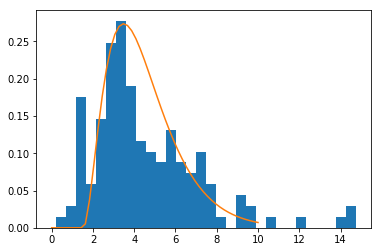

In [25]:
from scipy.stats.distributions import gamma

precip.Jan.hist(normed=True, bins=30, grid=False)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

Not bad for january :-) Looping over all months now, we can create a grid of plots for the distribution of rainfall, using the gamma distribution:

```python
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()
```

<div style="display:none;">
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()
</div>

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


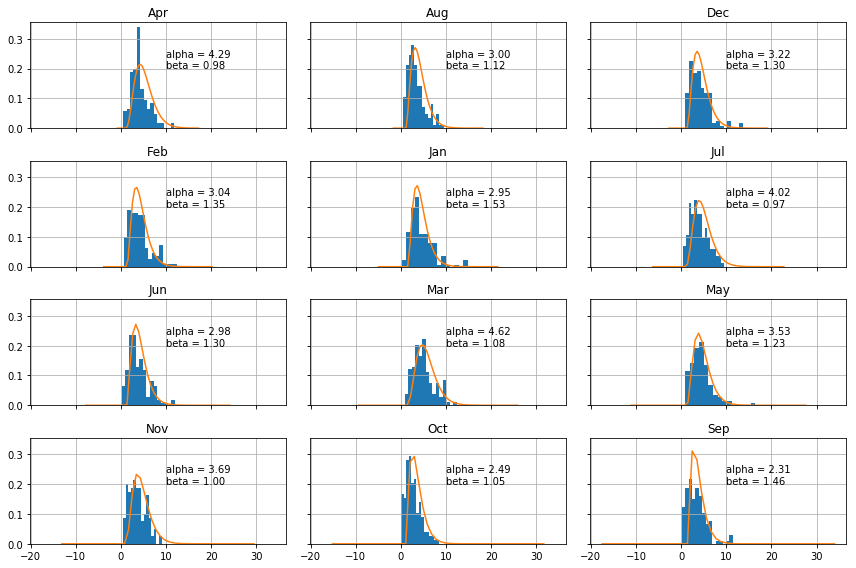

In [19]:
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))

plt.tight_layout()

In [27]:
help(ravel())

NameError: name 'ravel' is not defined

### 1.4 Conclusion

In math, a **moment** is a specific quantitative measure of the ***shape of a set of points***. 

The *zeroth* moment is the total mass, the *first* moment is the center of mass, the *second* moment is rotational inertia. Oops.. this is not mechanics 101, it's statistics 101...

So, the *zeroth* moment is total probability, *first* moment is the [mean](https://en.wikipedia.org/wiki/Mean), *second* moment is the [variance](https://en.wikipedia.org/wiki/Variance), *third* moment is the [skewness](https://en.wikipedia.org/wiki/Skewness), *fourth* moment is the [kurtosis](https://en.wikipedia.org/wiki/Kurtosis). And you can keep on going...

For a distribution of mass or probability on a bounded interval, the collection of all the moments (of all orders, from 0 to $\infty$) ***uniquely determines the distribution***. This is related to [Taylor's approximation theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem).

Minimum number of moments we need in the **Method of Moments** equal the ***number of the parameters in the estimator***! For each moment, we equate the moment of the ***model + parameters*** to the moment of the dataset. That gives us ***one*** equation for the parameters. We will need as many equations (thus moments) as there are parameters!

The method of Moments is ***easy-peasy***, as long as we have analytic formulas for the moments for the model distribution (which we usually do, *that is why* they are models). 

But they're usually *not* the most efficient estimators..

# 2. Maximum Likelihood Estimation (MLE)

**Maximum likelihood estimation** (MLE) fitting is usually ***more work*** than the method of moments, but is ***preferred*** as the resulting estimator is known to have ***good theoretical properties***. 

MLE is a method of estimating the *parameters* of a statistical model, given observations. MLE attempts to find the parameter values that ***maximize the likelihood function, given the observations***. 

Essentially, we attempt to find the values of the parameters (estimators) which would most likely, from a probability perspective, produce the data that we observed. We go from model to the data. We do not have the model, but we do have the data. So it is an ***inverse problem*** (btw, Inverse problems was the topic of my PhD thesis).

[Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) and [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace) where early users of maximum likelihood. [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) popularized it between 1912 and 1922, but it remained rigorously unproven until [Samuel S. Wilks](https://en.wikipedia.org/wiki/Samuel_S._Wilks) in 1938. [Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem) shows that the ***error in the logarithm of likelihood values for estimates from multiple independent samples is asymptotically distributed***. Wilks gave with his most general proof of the theorem in 1962.

MLE is used often with **count models** (general rule of thumb for Count models is that it is risky to use ML with samples smaller than 100, while samples over 500 seem adequate, so if you have only a couple hundred datapoints, ML won't work! In which case you need to fall back to theory, which is what we're doing here), and when we are interested in a dataset $(x,y)$ but are unable to obtain $y$ for the entire population $x$ and only able to obtain the $y$'s for a ***subset*** of $x$. 

So we assume all $y$ are **normally (gaussian) distributed** with some unknown **mean** and **variance**. The mean and variance are estimated with MLE while only knowing the $y$'s of the subset of $x$. 

- In general, when you have no idea about the distribution of data, and there are too few datapoints for a good historgram, start by assuming a gaussian distribution.

Here's the secret sauce of the algorithm:

- MLE accomplishes this by taking the mean and variance as **parameters**, and finding values for these parameters that make the observed results (the subset) the ***most probable given the normal model***. The analysis is an **iterative** one, which proceeds until a metric called the **log likelihood** ***converges***.

You will see it does sound very much like **variational inference** and **Markov Chain Monte Carlo** (MCMC) methods (when we'll look at these in class), but it's actually ***simpler***. From the point of view of Bayesian inference, MLE is a special case of [**maximum a posteriori estimation**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that assumes a **uniform prior** distribution of the parameters. Priors are avoided by not making probability statements about the parameters, but only about their estimates, whose properties are fully defined by the observations and the statistical model.

## 2.1 Example data set

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i \; | \;\lambda)$$
</div>

Assume the data is drawn from a Poisson distribution with parameter $\lambda =5$. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[11, 2, 3, 3, 8, 3, 7, 7, 2, 6, 3, 6, 5, 6, 6, 4, 5, 6, 6, 4, 4, 7, 1, 4, 4, 10, 6, 4, 4, 6, 7, 5, 2, 4, 6, 4, 7, 5, 5, 4, 3, 6, 3, 3, 6, 5, 4, 2, 5, 4, 7, 3, 3, 6, 8, 7, 6, 2, 6, 5, 8, 5, 10, 1, 4, 7, 8, 8, 6, 4, 6, 3, 3, 3, 6, 4, 1, 5, 6, 2, 4, 6, 6, 8, 2, 6, 2, 8, 5, 5, 5, 10, 4, 4, 7, 3, 4, 4, 7, 4]


/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Pr(y)')

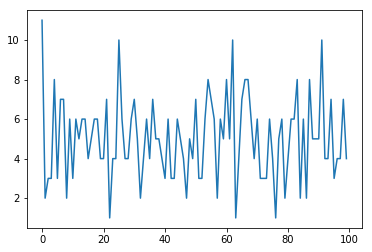

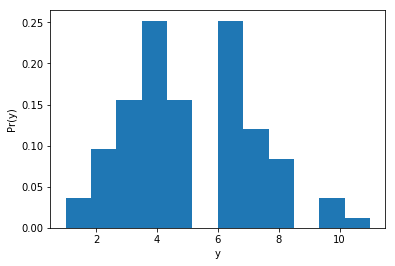

In [29]:
#y = np.random.poisson(5, size=100)
#plt.hist(y, bins=12, normed=True)
#plt.xlabel('y'); plt.ylabel('Pr(y)')

y = np.random.poisson(5, size=100)

print(list(y))
plt.figure(0)
plt.plot(list(y))

plt.figure(1)
plt.hist(y, bins=12, normed=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

## 2.2 The theory

The **likelihood function $l$** calculates the joint probability of observing $all$ the values of the dependent variable in our dataset, one after the other, when we evalaute our model. So it's an **intersection** of events, thus a **product of probabilities**. 

It assumes that each observation is drawn *randomly* and *independently* from the population. If the values of the dependent variable are random and independent, then you can find the joint probability of observing all the values simultaneously by multiplying the individual density functions:

$$l = \prod_{i=1}^n Pr(y_i \;| \;\lambda)$$ 

$l$ will give us a measure of how **likely we are** to observe values $y_1,\ldots,y_n$ given the parameter $\lambda$. 

**Maximum likelihood fitting** consists of **maximizing $l$** so that this outcome is **the most likely**. We call this function the *likelihood function*, because it is a measure of ***how likely the observations are if the model is true***.

We are essentially doing a kind of Bayesian inference: Instead of saying: ***the evidence are the observations, how do we get to the model?***, we say ***given the evidence of a normal model with unknown parameter, how likely are the observations***? 

We come up with an equation that involves the parameter, which we want to maximize. This in turn yields the right parameter for the model. So, instead of using moments, we find maxima on a function (which is also what ANNs, do by the way). It is also, I think, how ***your*** brain builds models: What are the right parameters so that my model yields my observations most probably?

And you know what? The likelihood function can be ***computed analytically***, in closed form, ***for all popular analytic distribution models***! Just like the moments, for all popular distribution models.

So, let's recap: 

- The product $\prod_{i=1}^n Pr(y_i \; | \; \theta)$ gives us a measure of how **likely** it is to observe values $y_1,\ldots,y_n$ given the parameters $\lambda$. MLE consists in choosing the appropriate function $l= Pr(Y|\theta)$ to maximize for a given set of observations. This function is called the *likelihood function*, because it is a measure of how likely the observations are if the model is true.

In the above model, the data were drawn from a Poisson distribution with parameter $\lambda =5$, That is,

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

Instead of looking at the function above as a function of $y$, let us look at it as a *function of* $\lambda$. Let's calculate the likelihood that the underlying process with $\lambda = 5$ generates any given value of $y$ (note the sexy factorial evaluation below). But let's start with $y$ = 10.

For any given value of $y$, we can calculate its likelihood. We use a python lambda function:

In [40]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 6
value = 2
poisson_like(value, lam)

0.044617539179994455

In [41]:
y

array([11,  2,  3,  3,  8,  3,  7,  7,  2,  6,  3,  6,  5,  6,  6,  4,  5,
        6,  6,  4,  4,  7,  1,  4,  4, 10,  6,  4,  4,  6,  7,  5,  2,  4,
        6,  4,  7,  5,  5,  4,  3,  6,  3,  3,  6,  5,  4,  2,  5,  4,  7,
        3,  3,  6,  8,  7,  6,  2,  6,  5,  8,  5, 10,  1,  4,  7,  8,  8,
        6,  4,  6,  3,  3,  3,  6,  4,  1,  5,  6,  2,  4,  6,  6,  8,  2,
        6,  2,  8,  5,  5,  5, 10,  4,  4,  7,  3,  4,  4,  7,  4])

The probability above is for $y$ = 10. What is the probability for all possible $y$'s?

In [42]:
np.sum(poisson_like(yi, lam) for yi in set(y))

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


0.9085907952633262

That's a pretty high probability!

Let's compare this to the same result for $\lambda$ = 8:

In [43]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in set(y))

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


0.7636636190641594

That's lower! Thus, $\lambda$ = 5 is a better value, more likely to lead our model to reproduce our dataset, because it gives us a ***higher probability to observe our $y$'s***!

(*duh*, of course it is, the data was drawn from a random Poisson process with $\lambda = 5$, but *we don't know that -well, we do, but we're pretending we don't* :-)

We can also plot the likelihood function for any value of $\lambda$, for a particular $y$ (let's pick $y$ = 5, arbitrarily):

Text(0,0.5,'L($\\lambda$|x=5)')

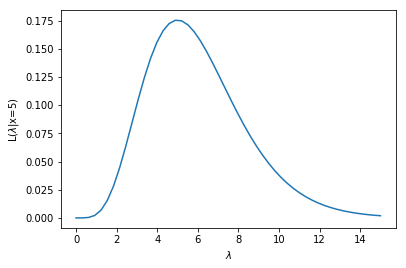

In [44]:
lambdas = np.linspace(0,15)
_y = 5
plt.plot(lambdas, [poisson_like(_y, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(_y))

Looks like $\lambda$ = 5 is about right for $y$ = 5.

Try it out for other values of $y$. Does the optimal $\lambda$ remain the same? 

How is the likelihood function different than the probability distribution function (pdf)? The likelihood is a function of the parameter(s) *given the data*, whereas the pdf returns the probability of data given a particular parameter value. 

Here is the pdf of the Poisson for $\lambda=5$.

Text(0,0.5,'Pr(X|$\\lambda$=5)')

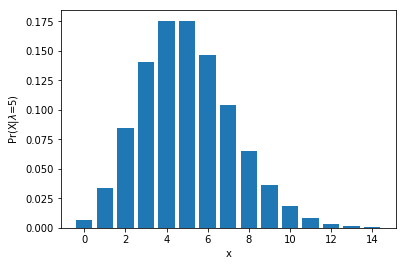

In [45]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

Ok, both curves look the same (kinda), but that is a coincidence. *It's not always like this*.

So we cannot locate one $\lambda$ that is optimal ***for all $y$'s***. So we have to ***compromise***. Specifically, we want the value of $\lambda$ which **maximizes the likelihood function**, because it yields a pdf that is the closest to the histogram of the data. 

In other words, our observations, which are a subset of all possible data which we can observe and record for a specific physical process, yield a histogram that we assume matches the pdf of all the data. So we model all possible data as a parametrized Poisson pdf. The Poisson pdf matches the histogram of the observed data the best when the likelihood function is maximal. And that happens when the area under the curve is maximal.

So, inference is reduced to an **optimization problem**.

## 2.3 The theory is actually very intuitive

In the 2019 season, before the Singaporean Grand Prix, Lewis Hamilton accrued 284 points out of 1,207 total points awarded. Having this data, we’d like to make a guess at the probability that Lewis Hamilton wins the Singaporean Grand Prix.

The simplest guess here would be 284/1,207 = 24%, which is the best possible guess based on the data. 

For the sake of argument, let's say Lewis Hamilton won 10 out of 20 races.

***This is actually an estimation with the MLE method***!

Let's simplify that Lewis Hamilton has a single winning probability (let’s call this θ) throughout all races across the season, regardless of the uniqueness of each race and any complex factors like weather. In other words, we’re assuming each of LH's races as a [Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial) with a winning probability θ.

With this assumption, we can describe the probability that LH wins k times out of n races for any given number k and n (k≤n). More precisely, we assume that the number of race wins for LH follows a [binomial distribution with parameter θ](https://en.wikipedia.org/wiki/Binomial_distribution).
The probability that LH wins k times out of n races, given the winning probability θ, is:

$$P(\text{k wins out of n races} \; | \; θ) = (^n_k) \; θ^k (1 - θ)^{n-k}$$

This simplification (describing the probability using just a single parameter θ regardless of real world complexity) is our statistical model, and θ is the parameter to be estimated.

Since we have observed data for this F1 season, which is 10 out of 20 wins for LH (let’s call this data as D), we can calculate P(D|θ) — the probability that this data D is observed for given θ. Let’s calculate P(D|θ) for $θ=0.1$ and $θ=0.7$ as examples.

$$P(\text{10 wins out of 20} \; | \; θ) = (^{20}_{5}) \; 0.1^{5} (0.9)^{15}$$

In [50]:
import math as m
P_10_wins_out_of_20_and_theta = m.factorial(20) // m.factorial(10) // m.factorial(10) * 0.1**10 * 0.9**10
P_10_wins_out_of_20_and_theta

6.442043387911565e-06

Wow, that's a ***very low probability***! So, if LH’s winning probability θ is actually 0.1, this data D (10 wins in 20 races) is ***extremely unlikely to be observed***.

Then what if θ = 0.7?

$$P(\text{10 wins out of 20} \; | \; θ) = (^{20}_{5}) \; 0.7^{5} (0.3)^{15}$$

In [51]:
P_10_wins_out_of_20_and_theta = m.factorial(20) // m.factorial(10) // m.factorial(10) * 0.7**10 * 0.3**10
P_10_wins_out_of_20_and_theta

0.030817080900085003

That's a *** higher probability***! So if LH’s winning probability θ is 0.7, this data D is ***much more likely to be observed*** than when θ = 0.1.

Based on this comparison, we would be able to say that θ is more likely to be 0.7 than 0.1 considering the actual observed data D. 

Here, we’ve been calculating the probability that D is observed for each θ, but at the same time, we can also say that we’ve been checking likelihood of each value of θ based on the observed data. Because of this, P(D|θ) is also considered as Likelihood of θ. 

The next question here is, what is the exact value of θ which maximizes the likelihood P(D|θ)? This is Maximum Likelihood Estimation!

The value of θ maximizing the likelihood can be obtained by having derivative of the likelihood function with respect to θ, and setting it to zero.

<br />
<center>
<img src =images/mle-math.png width = 600 />
</center>

Since likelihood goes to zero when θ= 0 or 1, the value of θ that maximizes the likelihood is k/n.

$$ θ = \frac{k}{n}$$

In other words, the estimated value of θ, LH's winning percentage per race, is 10/20 = 50% when estimated with MLE. 

And that is actually what you assumed in your HW, when you evaluated race pdfs!

## 2.4 Nashville rainfall

Now let's put MLE to use. Going back to our Nashville rainfall data, where we used a gamma distribution instead of a Poisson distribution, we need to maximize:

$$\prod_{i=1}^n \beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}$$ with respect to $(\alpha, \beta)$

In order to make the likelihood function more manageable (this is legit since `log` is monotonic with respect to its argument), the optimization is performed ***using a natural log transformation of the likelihood function***. And since the log of a product is the sum of the logs, we want to maximize:

$$\begin{align}l(\alpha,\beta) &= \sum_{i=1}^n \log[\beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}] \cr 
&= n[(\alpha-1)\overline{\log(x)} - \bar{x}\beta + \alpha\log(\beta) - \log\Gamma(\alpha)]\end{align}$$

(*so much easier to work in the log scale!*)

where $n = 2012 − 1871 = 141$ and the bar indicates an average over all *i*. We want to choose $\alpha$ and $\beta$ to maximize $l(\alpha,\beta)$.

Notice $l$ is infinite if any $x$ is zero. We do not have any zeros, but we do have an NA value for one of the October data, which we dealt with.

## 2.5 Solving the equation

To find the maximum of any function, we typically take the *derivative* with respect to the variable to be maximized, set it to zero and solve for that variable. 

$$\frac{\partial l(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$

Which can be solved as $\beta = \alpha\; / \; \bar{x}$. However, plugging this into the derivative with respect to $\alpha$ yields:

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\Gamma(\alpha)'}{\Gamma(\alpha)} = 0$$

This has ***no closed form solution***! We must use ***numerical optimization***!

Numerical optimization algorithms take an initial "guess" at the solution, and iteratively improve the guess until it gets "close enough" to the answer.

Here, we will use [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) algorithm:

<div style="font-size: 120%;">  
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
</div>

Which is available to us via `SciPy`:

In [52]:
from scipy.optimize import newton

Here is a graphical example of how Newton-Raphson converges on a solution, using an arbitrary function:

Text(1.47061,-0.2,'$x_{n+1}$')

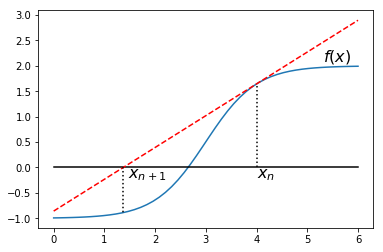

In [53]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')

# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

Let $x_n$ be our current estimate. Then the next estimate $x_{n+1}$ is obtained as follows: Draw the tangent line at $(x_n,f(x_n))$. Then $x_{n+1}$ is the point where the tangent line meets the x-axis. That tangent line meets the x-axis at a point often much closer to the root of the curve than $x_n$.

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest. In our case, this is:

In [54]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively. `psi` and `polygamma` are complex functions of the Gamma function that result when you take first and second derivatives of that function.

In [55]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Time to optimize!

In [56]:
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399616

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [57]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.8426160754841373

We can compare the fit of the estimates derived from MLE to those from the method of moments:

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


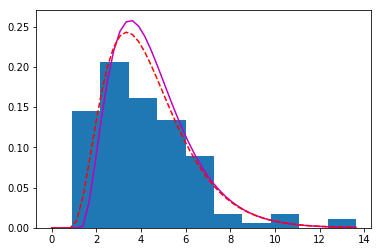

In [58]:
dec = precip.Dec
dec.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

The red dotted curve is a *better model* of our data than the continuous mauve curve. So MLE gives us better models than MOM.

For common distributions, `SciPy` includes methods for fitting via MLE:

In [59]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

(2.242751775315231, 0.6549460447018862, 1.570073932063466)

This fit is not directly comparable to our estimates, however, because SciPy's `gamma.fit` method fits an odd 3-parameter version of the gamma distribution. But don't let the three parameters  (alpha, loc, beta) provided throw you off! There's `alpha` and `beta` that you know of, and the other one is `loc`, the location at which the gamma distribution ***starts growing***, since you can liberally move the gamma along the x-axis.

In general, the gamma function has three parametrizations:

- With a shape parameter k and a scale parameter θ.
- With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
- With a shape parameter k and a mean parameter μ = k/β.

It's possible to shift and/or scale the distribution using the loc and scale parameters. Specifically, gamma.pdf(x, alfa, loc, scale) is identically equivalent to gamma.pdf(y, alfa) / scale with y = (x - loc) / scale.


## 2.6 Another dataset example

Let's try our hands at another dataset that better illustrates the modeling process because it incorporates a mistake you might make in picking a model.

We'll use `statsmodels`, a Python package for statistical data analyses, which will help us avoid the math!

<br />
<center>
<img src =images/happy-cat.jpg width = 400 />
</center>


`statsmodels` just like R, also contains real-world datasets that you can use to experiment with new methods. Let's load the **heart dataset**:

In [60]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = statsmodels.datasets.heart.load_pandas().data

Let's take a closer look at the dataframe:

In [61]:
data.tail()

survival  censors   age
64      14.0      1.0  40.3
65     167.0      0.0  26.7
66     110.0      0.0  23.7
67      13.0      0.0  28.9
68       1.0      0.0  35.2

This dataset contains censored and uncensored data: a censor of 0 means that the patient was ***alive at the end of the study***, and thus we don't know the exact survival time. We only know that the patient survived at least the indicated number of days. 

Let's only keep uncensored data (thus introduce a [bias](https://en.wikipedia.org/wiki/Bias) toward patients that ***did not survive very long*** after their transplant):

In [62]:
data = data[data.censors == 1]
survival = data.survival

Let's take a look at the data graphically, by plotting the raw survival data and the histogram. Notice how the data is 2D, however the histogran is really 1D: It gives us the possible $y$'s and their ***distribution***.

Text(0,0.5,'Number of patients')

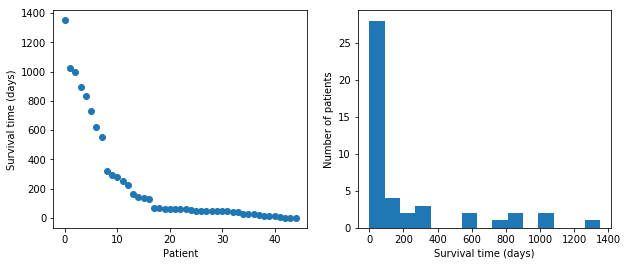

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

We observe that the histogram is decreasing very rapidly! Patients died fast!

Eyeballing the data, let's try to fit an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) to the data. Isn't that would *you* would try?

According to the exponential model, S (number of days of survival) is an exponential random variable with the parameter λ, and the observations $s_i$ are sampled from this distribution. Let the sample **mean** be:

$$\overline s = \frac 1 n \sum s_i$$

The likelihood function of an exponential distribution is as follows:

$$\mathcal{L}(\lambda, \{s_i\}) = P(\{s_i\} \mid \lambda) = \lambda^n \exp\left(-\lambda n \overline s\right)$$

Here's the proof:

\begin{align*}
\mathcal{L}(\lambda, \{s_i\}) &= P(\{s_i\} \mid \lambda) &\\
&= \prod_{i=1}^n P(s_i \mid \lambda) & \textrm{(by independence of the $s_i$)}\\
&= \prod_{i=1}^n \lambda \exp(-\lambda s_i) &\\
&= \lambda^n \exp\left(-\lambda \sum_{i=1}^n s_i\right) &\\
&= \lambda^n \exp\left(-\lambda n \overline s\right) &
\end{align*}

Here, $\overline s$ is the sample mean.

To find the maximum of this function, let's compute its derivative function with respect to $λ$:

$$\frac{d\mathcal{L}(\lambda, \{s_i\})}{d\lambda} = \lambda^{n-1} \exp\left(-\lambda n \overline s \right) \left( n - n \lambda \overline s \right)$$

The root of this derivative is therefore $λ=1\;/\;\overline s$. We're lucky here, the exponential is simple to diffferentiate.  In more complex situations, we would require numerical optimization methods, like Newton-Raphson, to maximize the likelihood function.

Let's compute this parameter ***numerically***:

In [64]:
smean = survival.mean()
rate = 1. / smean
rate

0.004478503184713376

Let's compare the fitted exponential distribution to the data. We first need to generate linearly spaced values for the x-axis (days):

In [65]:
smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two consecutive values in `days`
dt = smax / 999.

We get the probability density function of the exponential distribution with` SciPy`. 

The parameter is the scale, the inverse of the estimated rate.

In [66]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

Let's plot the histogram and the obtained distribution. 

We need to rescale the theoretical distribution to the histogram (depending on the bin size and the total number of data points):

Text(0,0.5,'Number of patients')

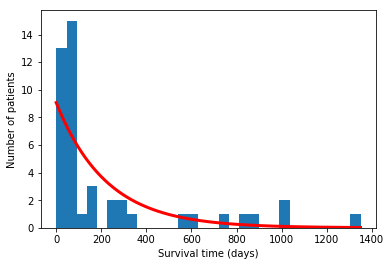

In [67]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

hmmm... 

What do you think?

The fit between the model and our data is ***ok-ish***, but not ***perfect***..

# 2.8 Avoiding the math, and a better model

Just like with our probability function `p`, you can avoid the math when you can write python! 

You can also avoid the math if you know how to write python and you know where to find the useful libraries!

`SciPy` actually integrates numerical maximum likelihood routines for a large number of distributions. Let's leverage `SciPy` to estimate the parameter of the exponential distribution:

In [68]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)

Before we plot, let's perform a **goodness of fit test**. A good statistical goodness of fit test is the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), also known as **KS** test. it is sensitive to differences in *both* location and shape of the empirical [cumulative distribution functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (cdf) of the two samples.

The cdf is the area under the pdf: the cdf evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. In the case of scalar continuous distributions, it gives the area under the pdf from minus infinity to $x$.

In [69]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199693810792966, pvalue=8.647045785181717e-06)

Here, the p-value is very low: the null hypothesis (stating that the observed data stems from an exponential distribution with a maximum likelihood rate parameter) can be rejected with high confidence!

- We'll talk about p-values and null-hypotheses in our ***next lecture***. They're very important point estimators in classical statistical inference. Still very much used in industry (but your professor thinks they suck, since Bayesian inference, which yields pdfs instead of point estimates, is much better).

Oh no...! The exponential distribution is thus ***not a good fit for the data***, and the **KS** test told us so!

Let's try another distribution, the [Birnbaum-Sanders distribution](https://en.wikipedia.org/wiki/Birnbaum-Saunders_distribution), which is typically used to model **failure times**. You wouldn't know about this model distribution ***without experience in data science***.

In [70]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.1877344610194689, pvalue=0.07321149700086327)

This time, the p-value is about 0.073, so that we would ***not reject the null hypothesis*** with a five percent confidence level!

Ok, let's plot now.

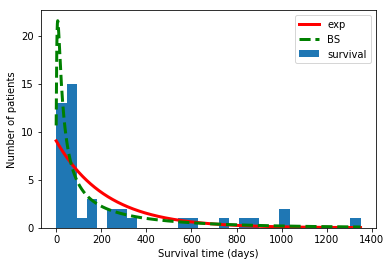

In [71]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

Yes, Birnbaum-Sanders (BS) fits the data a lot better than the exp distribution!

Once again, 

- The maximum likelihood estimate (MLE) for the rate parameter(s) is, by definition, the value of the parameters that maximizes the likelihood function. It is the parameter(s) that maximize the probability of observing the data, assuming that the observations are actually sampled from the distribution we picked as a model.

We then either verify by plotting the data and the model with the MLE parameter(s) and see if it's a good match, or use goodness of fit tests like the **KS** test to get a more objective estimate. There are [many](https://en.wikipedia.org/wiki/Goodness_of_fit) different goodness of fit tests! Which we pick is part of the art!
If we are wrong and the fit is not very good, back to the drawing board for another model!

<br />
<center>
<img src =images/frustration.png width = 400 />
</center>

# 3. Kernel Density Estimates

You can also estimate a probability distribution ***nonparametrically*** with a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation.) (KDE).

In some instances, you may not be interested in the parameters of a particular distribution of data, but just a smoothed representation of the data at hand. In this case, you can estimate the disribution *non-parametrically* (i.e. making no assumptions about the form of the underlying distribution) using [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE). 

KDE is a fundamental data smoothing problem where inferences about the population are made based on a finite data sample.

The kernel density estimator of a set of n points ${x_i}$ is given as:

$$\hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big)$$

Here, $h>0$ is a scaling parameter (the bandwidth) and $K(u)$ is the kernel, a symmetric function that integrates to 1. This estimator is to be compared with a classical histogram, where the kernel would be a top-hat function (a rectangle function taking its values in ${0,1}$), but the blocks would be located on a regular grid instead of the data points.

Multiple kernels can be chosen. Here, we chose a Gaussian kernel, so that the KDE is the superposition of Gaussian functions centered on all the data points. It is an estimation of the density.

The choice of the bandwidth is not trivial; there is a [tradeoff](https://en.wikipedia.org/wiki/Bias-variance_dilemma.) between a too low value (small bias, high variance: overfitting) and a too high value (high bias, small variance: underfitting). 

There are several methods to automatically choose a sensible bandwidth. SciPy uses a rule of thumb called Scott's Rule: $h = n^{\frac{-1}{d + 4}}$

The following figure illustrates the KDE. The sample dataset contains four points in [0,1] (black lines). The estimated density is a smooth curve, represented here with different bandwidth values.

<br />
<center>
<img src =images/kde.png width = 600 />
</center>

## 3.1 Some random data

In [72]:
# Some random data
y = np.random.random(15) * 10
y

array([5.83662063, 5.79027008, 0.31612982, 5.09596705, 4.15667701,
       7.09318534, 3.99976512, 8.41767157, 8.88753747, 8.79167972,
       7.32559202, 2.51482266, 1.92337714, 9.31630142, 5.24898691])

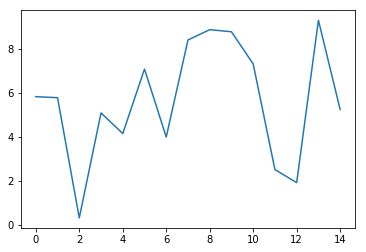

In [73]:
plt.plot(y)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.11851626, 0.        , 0.11851626, 0.11851626, 0.        ,
        0.        , 0.23703252, 0.        , 0.23703252, 0.23703252,
        0.        , 0.        , 0.23703252, 0.        , 0.11851626,
        0.35554878]),
 array([0.31612982, 0.87864054, 1.44115127, 2.00366199, 2.56617272,
        3.12868344, 3.69119417, 4.25370489, 4.81621562, 5.37872634,
        5.94123707, 6.50374779, 7.06625852, 7.62876924, 8.19127997,
        8.75379069, 9.31630142]),
 <a list of 16 Patch objects>)

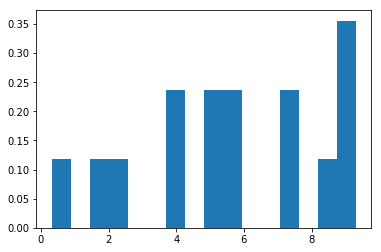

In [74]:
plt.hist(y, bins=16, normed=True)

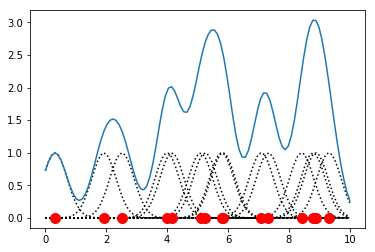

In [75]:
from scipy.stats.distributions import norm

x = np.linspace(0, 10, 100)

# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

#plt.plot(x, y)
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. 

## 3.2 Bimodal distribution

Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

In [76]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)

# Append by row
x = np.r_[x1, x2]

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.0127596 , 0.02551919, 0.05741819, 0.06379798, 0.06379798,
        0.08931718, 0.17225456, 0.15311516]),
 array([-6.6848832 , -5.11743557, -3.54998794, -1.98254031, -0.41509268,
         1.15235495,  2.71980258,  4.28725021,  5.85469784]),
 <a list of 8 Patch objects>)

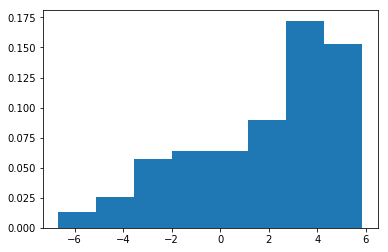

In [77]:
plt.hist(x, bins=8, normed=True)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


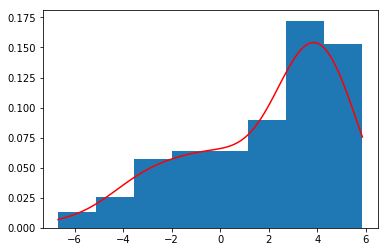

In [78]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=8, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

## 3.3 Spatial distribution

We look at the geographical locations of tropical cyclones from 1848 to 2013, based on data provided by the NOAA, the US' National Oceanic and Atmospheric Administration.

We use a kernel density estimation (KDE) to estimate that pdf.

First, install a [map server](https://pypi.org/project/geos/):
```(python)
pip install geos
```

If you want a full geometry engine (*optional*), look [here](https://trac.osgeo.org/geos).

Then, import the [cartopy](http://scitools.org.uk/cartopy/) library:
```(python)
conda install cartopy
```

<br />
<center>
<img src =images/cartopy-install.png width = 900 />
</center>

In [79]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
%matplotlib inline

 Open the data with pandas:

In [80]:
# www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'Allstorms.ibtracs_wmo.v03r05.csv?'
                 'raw=true')

This dataset contains information about most storms since 1848. A single storm may appear multiple times across several consecutive days.

In [81]:
df[df.columns[[0, 1, 3, 8, 9]]].head()

Serial_Num  Season Basin  Latitude  Longitude
0  1848011S09080    1848    SI      -8.6       79.8
1  1848011S09080    1848    SI      -9.0       78.9
2  1848011S09080    1848    SI     -10.4       73.2
3  1848011S09080    1848    SI     -12.8       69.9
4  1848011S09080    1848    SI     -13.9       68.9

Use pandas' `groupby()` function to obtain the average location of every storm:

In [82]:
dfs = df.groupby('Serial_Num')
pos = dfs[['Latitude', 'Longitude']].mean()
x = pos.Longitude.values
y = pos.Latitude.values
pos.head()

Latitude  Longitude
Serial_Num                         
1848011S09080 -15.918182  71.854545
1848011S15057 -24.116667  52.016667
1848061S12075 -20.528571  65.342857
1851080S15063 -17.325000  55.400000
1851080S21060 -23.633333  60.200000

Let's display the storms on a map with cartopy. 

This toolkit allows us to easily project the geographical coordinates on the map.

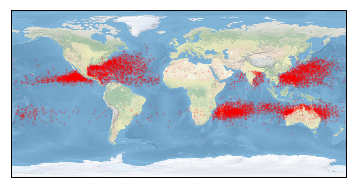

In [83]:
# We use a simple equirectangular projection,
# also called Plate Carree.
geo = ccrs.Geodetic()
crs = ccrs.PlateCarree()
# We create the map plot.
ax = plt.axes(projection=crs)
# We display the world map picture.
ax.stock_img()
# We display the storm locations.
ax.scatter(x, y, color='r', s=.5, alpha=.25, transform=geo)

 Before performing the kernel density estimation, we transform the storms' positions from the **geodetic coordinate system** (longitude and latitude) into the map's coordinate system, called **plate carrée**.

In [84]:
h = crs.transform_points(geo, x, y)[:, :2].T
h.shape

(2, 6940)

Now, we perform the kernel density estimation on our (2, N) array.

In [85]:
kde = st.gaussian_kde(h)

The `gaussian_kde()` routine returned a Python function. To see the results on a map, we need to evaluate this function on a 2D grid spanning the entire map. We create this grid with meshgrid(), and we pass the x and y values to the kde() function:

In [86]:
k = 100
# Coordinates of the four corners of the map.
x0, x1, y0, y1 = ax.get_extent()
# We create the grid.
tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                     np.linspace(y0, y1, k))
# We reshape the grid for the kde() function.
mesh = np.vstack((tx.ravel(), ty.ravel()))
# We evaluate the kde() function on the grid.
v = kde(mesh).reshape((k, 2 * k))

Before displaying the KDE heatmap on the map, we need to use a special colormap with a transparent channel. This will allow us to superimpose the heatmap on the stock image:

In [87]:
# [https://stackoverflow.com/a/37334212/1595060](https://stackoverflow.com/a/37334212/1595060)
cmap = plt.get_cmap('Reds')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

Finally, we display the estimated density with imshow():

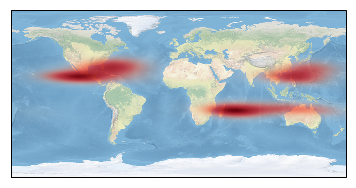

In [88]:
ax = plt.axes(projection=crs)
ax.stock_img()
ax.imshow(v, origin='lower',
          extent=[x0, x1, y0, y1],
          interpolation='bilinear',
          cmap=my_cmap)

# 4. Limitations of MLE and classical statistical estimation

What do you need to know?

- MOM equates the empirical and theoretical moments to yield the parameters of your model. 

- MLE gives you the value which maximises the Likelihood P(D|θ). 

- [Maximum a Posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP), which we skipped over, yields the value which maximises the posterior probability P(θ|D). As both methods give you a single fixed value, they’re considered to be **point estimators**.

- How to numerically evaluate the parameters of your model using the first two methods. You do not need to know the math (but if you understand it, that is a good thing!)

**Bayesian inference**, as we will see next week, ***fully calculates the posterior probability distribution***, as Bayes' formula below. 

$$p(θ \; | \; D) = \frac{p(D \; | \; θ) \; p(θ)}{p(D)}$$

Hence the output is not a single value, i.e. a **point estimate** for the parameters of your model, but a **probability density function*** (when θ is a continuous variable) or a ***probability mass function*** (when θ is a discrete variable) ***for the parameters of your model***. That way, you know what the most likely value is, ***but also the amount of error you might be making***!

- MLE and MAP return a single fixed value(s) for the model parameter, but Bayesian inference returns functions (pdfs)  instead!

Assume you’re in a casino with full of slot machines with 50% winning probability. After playing for a while, you hear a rumour that there’s ***one special slot machine*** with 67% winning probability!

Now, you’re observing people playing 2 suspicious slot machines (you’re sure that one of those is the special slot machine!) and get the following data.

Machine A: 3 wins out of 4 plays
Machine B: 81 wins out of 121 plays

By intuition, you would think machine B is the special one! Because 3 wins out of 4 plays on machine A could just happen by chance. But machine B’s data doesn’t look like it's happening by chance!

The posterior probability distribution P(θ|D), calculated as a Gamma function, is plotted below for the two machines:

<br />
<center>
<img src =images/tricked-slot-machines.png width = 400 />
</center>

Although both distributions have their mode on θ=0.666 (MLE estimate), the shapes of the distributions are quite different. Density around the mode is much higher in the distribution of machine B than the one of machine A.

So a pdf yields much more information than a point estimate. In particular, it tells us about errors in the estimation. And that is very important when a model is making a potentially dangerous prediction (e.g. ***drive 120 mph on this road***).

***Ummm... computer, what's an estimation of the error you might be making in your prediction?***

<br />
<center>
<img src =images/crazy-robot.jpg width = 300 />
</center>

So we will now turn our attention to Bayesian estimation. Bayes' formula is actually pretty complex. Specifically, the term in the denominator, a **marginal probability**,  needs to be calculated for every possible θ:

<br />
<center>
<img src =images/bayes-complex.png width = 500 />
</center>

That integral sum (for the continuous case, a simple sun for discrete cases) is the reason why we had to wait for powerful laptops before we could actually put Bayesian estimation to practice. 

When the model is ***analytic***, like the ones in this notebook, solutions are forthcoming, albeit with a bit of math. But that is rarely the case in real-world applications. We then need to use ***Monte Carlo*** and other probabilistic programming methodologies as substitute for direct integral computation. That is what we'll look at next week.

# Homework

Find a sexy dataset and predict future values using random forest regression. See how far into the future you can predict (with at least 75% accuracy on a test dataset). 

Find a dataset and model it by guessing a pdf that matches its histogram. Then find the mist likely parameters of your pdf using MLE.

***You may work in teams of 2***.

We know the theory works, right? The point here is to find the ***sexiest, most original dataset ever***. You will not get a good grade if you use boring datasets that everyone can easily google for. For example, if you can compile your own dataset by getting data, say from *Tatte's*, that sounds pretty sexy to me.

3 A+ grades will be given out for the most original datasets, and you will present your notebook in class next week.